In [55]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
# from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [56]:
def load_happy_dataset():
    train_dataset = h5py.File("train_happy.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File("test_happy.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [57]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


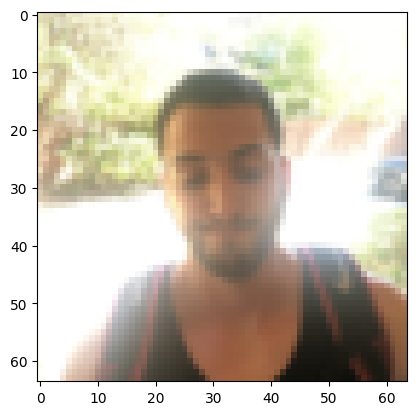

In [58]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [59]:
# GRADED FUNCTION: happyModel

def happyModel():
    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
        tfl.Conv2D(32, (7,7)),
        tfl.BatchNormalization(axis=-1),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(1, activation='sigmoid')
        ])
    
    return model

In [60]:
happy_model = happyModel()
# Print a summary for each layer
# for layer in summary(happy_model):
#     print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
# comparator(summary(happy_model), output)
output

[['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
 ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
 ['BatchNormalization', (None, 64, 64, 32), 128],
 ['ReLU', (None, 64, 64, 32), 0],
 ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
 ['Flatten', (None, 32768), 0],
 ['Dense', (None, 1), 32769, 'sigmoid']]

In [61]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [62]:
happy_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_7 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_7 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_11 (ReLU)             (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                      

In [63]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 3s 54ms/step - loss: 1.8558 - accuracy: 0.6517
Epoch 2/10
38/38 [==============================] - 2s 57ms/step - loss: 0.2011 - accuracy: 0.9200
Epoch 3/10
38/38 [==============================] - 2s 57ms/step - loss: 0.2096 - accuracy: 0.9150
Epoch 4/10
38/38 [==============================] - 3s 79ms/step - loss: 0.1298 - accuracy: 0.9500
Epoch 5/10
38/38 [==============================] - 3s 68ms/step - loss: 0.0996 - accuracy: 0.9683
Epoch 6/10
38/38 [==============================] - 3s 65ms/step - loss: 0.2472 - accuracy: 0.9117
Epoch 7/10
38/38 [==============================] - 2s 61ms/step - loss: 0.1599 - accuracy: 0.9450
Epoch 8/10
38/38 [==============================] - 2s 59ms/step - loss: 0.0717 - accuracy: 0.9717
Epoch 9/10
38/38 [==============================] - 2s 58ms/step - loss: 0.0696 - accuracy: 0.9800
Epoch 10/10
38/38 [==============================] - 2s 56ms/step - loss: 0.0826 - accuracy: 0.9667


In [64]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 27ms/step - loss: 0.1438 - accuracy: 0.9533


[0.14383597671985626, 0.95333331823349]

In [65]:
# Loading the data (signs)
# X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 1


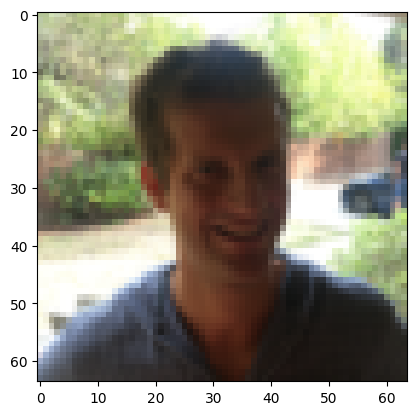

In [66]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [67]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 6)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 6)


In [68]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [70]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
output

NameError: name 'input_img' is not defined

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model! 

In [71]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
10/10 [==============================] - 1s 57ms/step - loss: 0.1780 - accuracy: 0.9367 - val_loss: 0.2742 - val_accuracy: 0.8800
Epoch 2/100
10/10 [==============================] - 1s 61ms/step - loss: 0.1765 - accuracy: 0.9400 - val_loss: 0.2740 - val_accuracy: 0.8800
Epoch 3/100
10/10 [==============================] - 1s 80ms/step - loss: 0.1748 - accuracy: 0.9400 - val_loss: 0.2724 - val_accuracy: 0.8800
Epoch 4/100
10/10 [==============================] - 1s 54ms/step - loss: 0.1730 - accuracy: 0.9400 - val_loss: 0.2709 - val_accuracy: 0.8800
Epoch 5/100
10/10 [==============================] - 1s 51ms/step - loss: 0.1713 - accuracy: 0.9400 - val_loss: 0.2692 - val_accuracy: 0.8800
Epoch 6/100
10/10 [==============================] - 0s 50ms/step - loss: 0.1701 - accuracy: 0.9417 - val_loss: 0.2678 - val_accuracy: 0.8867
Epoch 7/100
10/10 [==============================] - 1s 67ms/step - loss: 0.1682 - accuracy: 0.9450 - val_loss: 0.2638 - val_accuracy: 0.8800
Epoch 

In [72]:
history.history

{'loss': [0.1779823899269104,
  0.17651593685150146,
  0.17476332187652588,
  0.17300869524478912,
  0.17133043706417084,
  0.17006361484527588,
  0.16816143691539764,
  0.1672174483537674,
  0.1657048463821411,
  0.1641077697277069,
  0.16220898926258087,
  0.16071796417236328,
  0.15931819379329681,
  0.15833641588687897,
  0.15719851851463318,
  0.15578167140483856,
  0.1543119251728058,
  0.15286922454833984,
  0.15181376039981842,
  0.15082868933677673,
  0.1500747799873352,
  0.14925865828990936,
  0.1479686200618744,
  0.1466389298439026,
  0.14530040323734283,
  0.14418663084506989,
  0.1432664543390274,
  0.1425607055425644,
  0.14161019027233124,
  0.14063845574855804,
  0.13955308496952057,
  0.1387740969657898,
  0.1378037929534912,
  0.13688279688358307,
  0.13593605160713196,
  0.13511212170124054,
  0.13461421430110931,
  0.13378961384296417,
  0.13289274275302887,
  0.13175633549690247,
  0.1308954507112503,
  0.13010817766189575,
  0.12961144745349884,
  0.128874406218

C:\Users\Asus\AppData\Local\Temp\ipykernel_29612\973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29612\973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

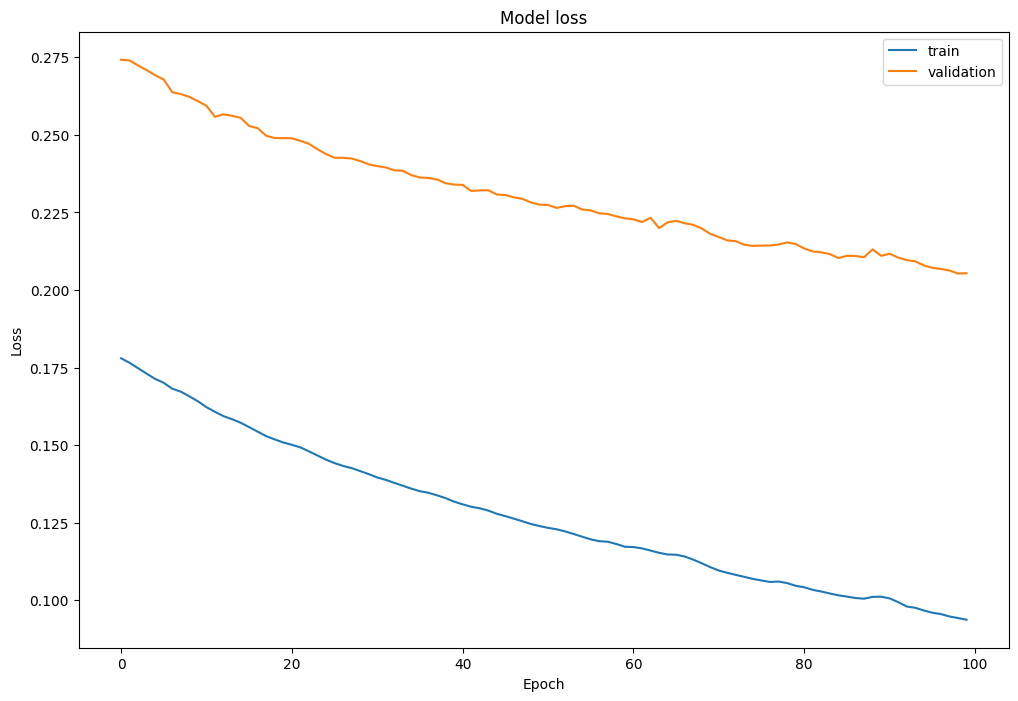

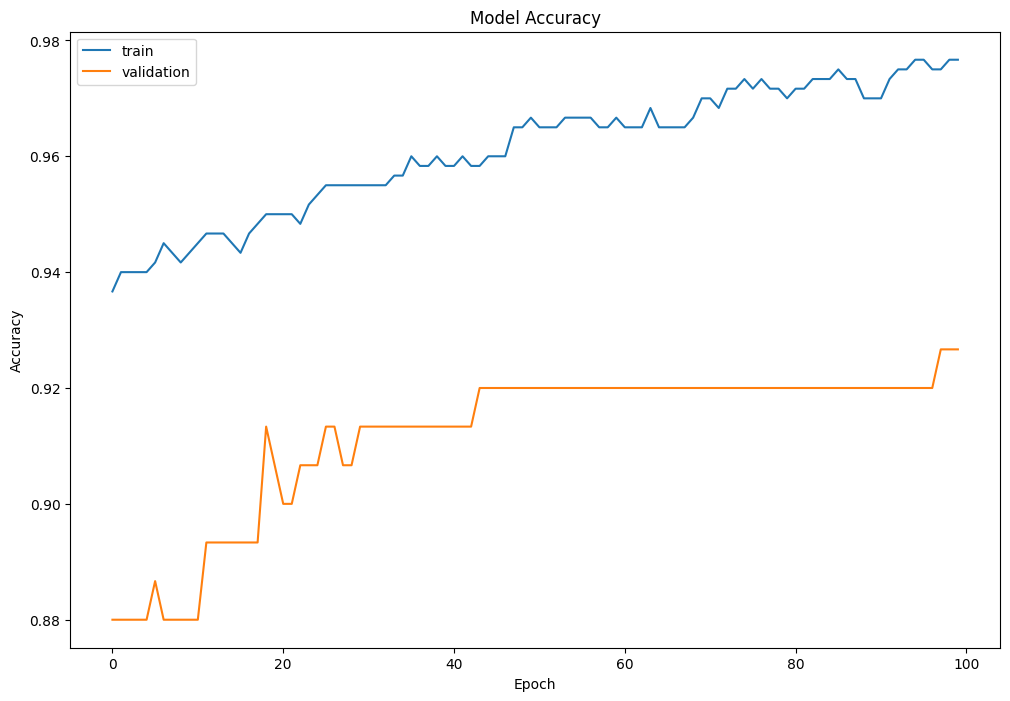

In [73]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')